We are going to load up the values of several experiments and see if we can make some compelling graphics about the timing etc. of doing brute force calculation.

We have the following experiments:
1. Time Samples ApproConcorde
2. Time Samples SubsetConcorde
3. Time Shapley Computation
4. Error For Sample Number ApproConcorde
5. Error For Sample Number SubsetConcorde

Each one is in a vrg/dat/timing_data

Comment lines in the file give us some details as to what's in there.  Each experiment has been run for a set number of replicates (1070) at each step so that each number can be assumed to be accurate on average.



In [1]:
### Standard Magic..

import math
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
matplotlib.style.use('bmh')

font = {'size'   : 20}

matplotlib.rc('font', **font)

path = "../../dat/timing_data/"


In [15]:
### Experiment 1 and 2 analysis...

# Sample Times..
exp_1_data = pd.read_csv(path + "exp_1_1070.csv", comment="*")
exp_2_data = pd.read_csv(path + "exp_2_1070.csv", comment="*")

#Shapley Value Computation
exp_3_data = pd.read_csv(path + "exp_3_11p_10.csv", comment="*")
error = exp_1_data.pivot(index='sample_number', columns='num_players', values='std_time')


#exp_2_data['time'] = exp_2_data['time'] / exp_2_data['num_runs']

# Try to fix this... 
tdata = exp_1_data.ix[:, [4,7,10,13,15]]
#data = tdata.pivot(index='sample_number', columns='num_players', values='mean_time')
#error = exp_1_data.pivot(index='sample_number', columns='num_players', values='std_time')
#p = data.ix[:, [4,7,10,13,15,17]
            
print(tdata)

IndexError: indices are out-of-bounds

KeyError: 0

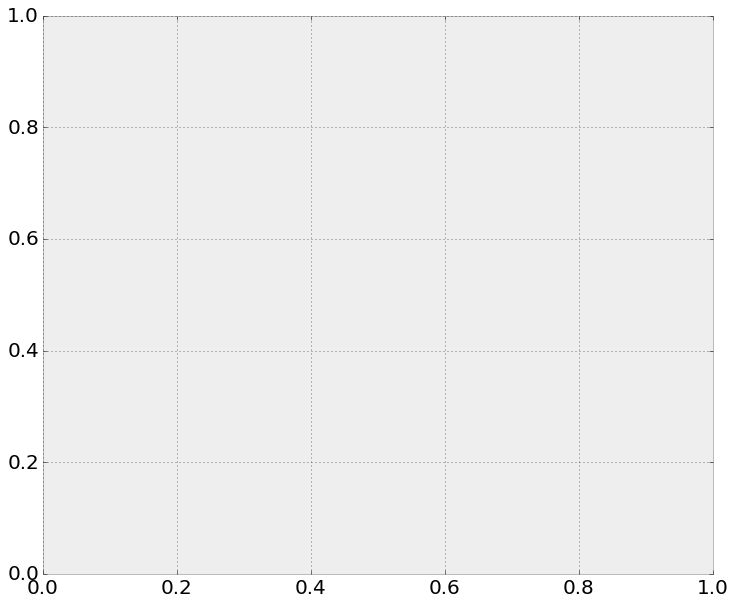

In [9]:
## Make a data series for each of the num players
#view = exp_1_data[['num_players', 'sample_number', 'mean_time']]

#print(view.reindex(index=[1000],columns=[4,5]))

data = exp_1_data.pivot(index='sample_number', columns='num_players', values='mean_time')
error = exp_1_data.pivot(index='sample_number', columns='num_players', values='std_time')
p = data.ix[:, [4,7,10,13,15,17]].plot(yerr=error.ix[:, [4,7,10,13,15,17]], marker='.', \
                                    xlim=(0, 100000), ylim=(0,500), figsize=(12, 10))
p.legend(title="Num. Locations",loc='upper left', fontsize='small')
p.set_title("ApproShapley with Concorde")
p.set_xlabel("Sample")
p.set_ylabel("Time (Seconds)")
plt.savefig('appro_timing.png',bbox_inches='tight')

# data = exp_2_data.pivot(index='sample_number', columns='num_players', values='mean_time')
# error = exp_2_data.pivot(index='sample_number', columns='num_players', values='std_time')
# p = data.ix[:, [4,7,10,13,15,17]].plot(yerr=error, marker='.', \
#                                     xlim=(0, 100000), ylim=(0,500), figsize=(12, 10))
# p.set_title("SubsetShapley with Concorde")
# p.legend(title="Num. Locations", loc='upper left', fontsize='small')
# p.set_xlabel("Sample")
# p.set_ylabel("Time (Seconds)")
# plt.savefig('subset_timing.png',bbox_inches='tight')

# for i in exp_2_data['num_players'].unique():
#     subset = exp_2_data[exp_2_data['num_players']==i]
#     subset.plot(x='sample_number', y='time', legend=str(i))

#data = exp_3_data.pivot(index='sample_number', columns='num_players', values='mean_time')
#error = exp_3_data.pivot(index='sample_number', columns='num_players', values='std_time')
p = exp_3_data.plot(x='num_players', y='mean_time', yerr='std_time', marker='.', markersize=20, \
                    legend=None, xlim=(3.8, 11.2), ylim=(0,500), figsize=(12, 10))
p.set_title("Shapley Value with Concorde")
p.set_xlabel("Number of Locations")
p.set_ylabel("Time (seconds)")
plt.savefig('shapley_timing.png',bbox_inches='tight')



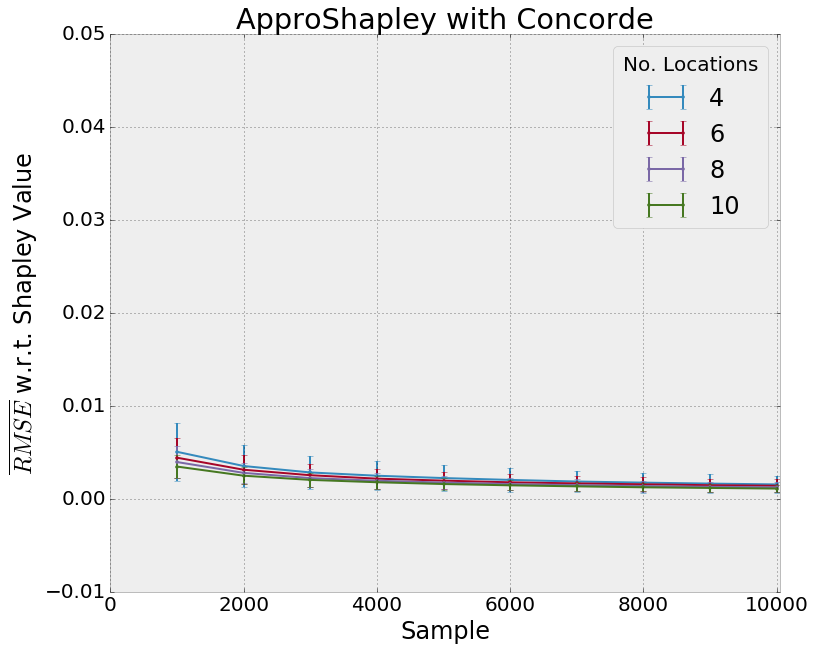

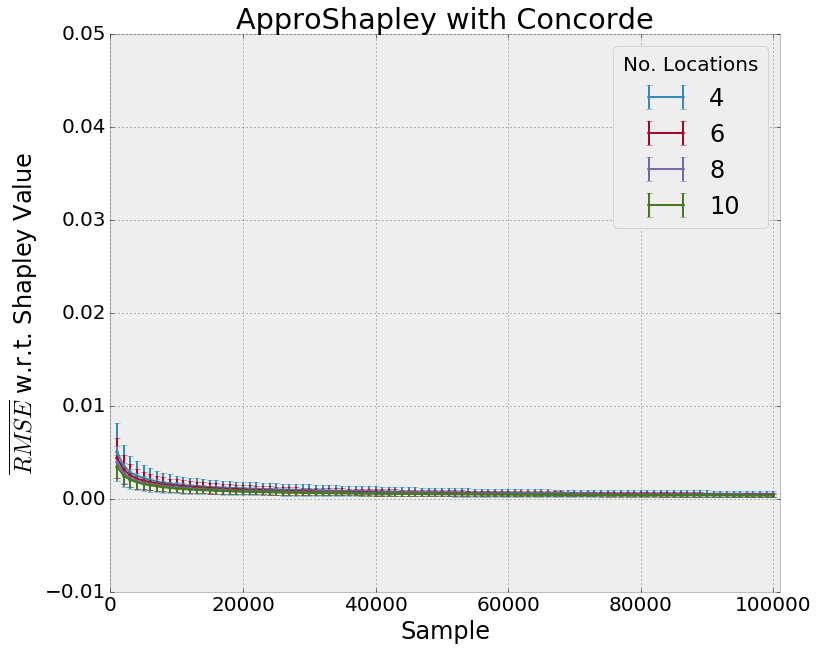

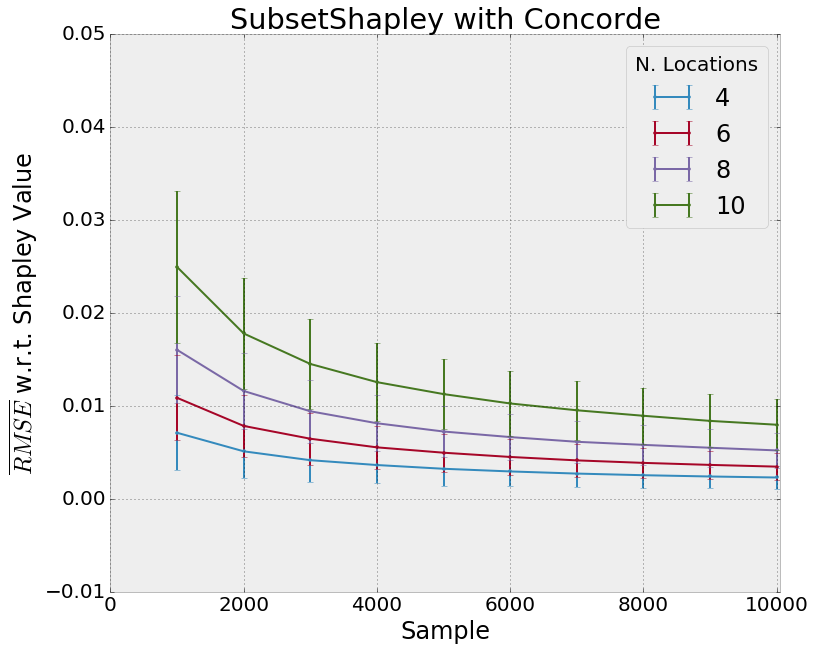

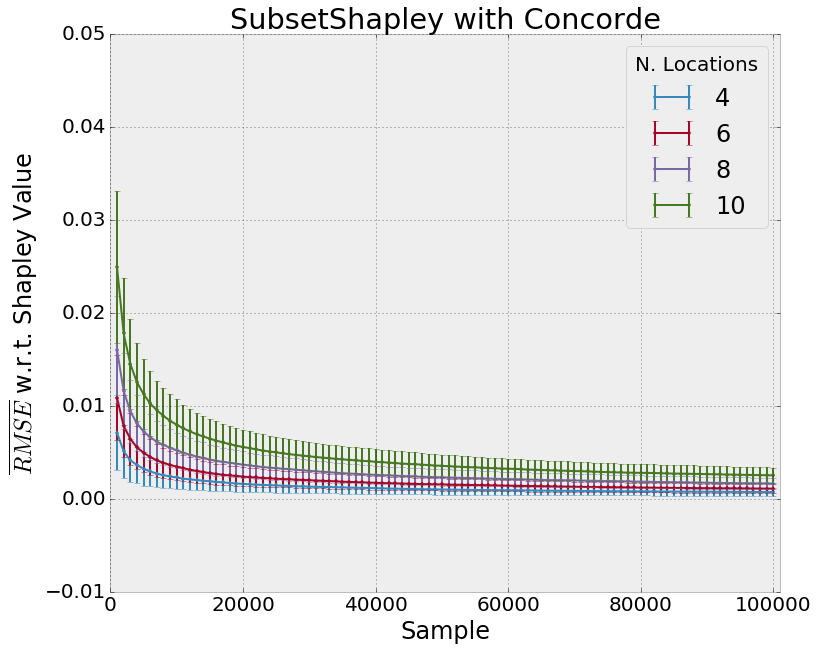

In [15]:
### 10k and 100k error plots..

# Sample Times..
exp_4_data = pd.read_csv(path + "exp_4_1070.csv", comment="*")
exp_5_data = pd.read_csv(path + "exp_5_1070.csv", comment="*")

#print(exp_5_data.loc[:5, ])

### ApproShapley..

data = exp_4_data.pivot(index='sample_number', columns='num_players', values='mean_rmse')
error = exp_4_data.pivot(index='sample_number', columns='num_players', values='std_rmse')
p = data.ix[[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000],[4,6,8,10]].plot(yerr=error, marker='.',\
                         xlim=(-1, 10050), ylim=(-0.01,0.05), figsize=(12, 10))

p.legend(title="Num. Locations")
p.set_title("ApproShapley with Concorde")
p.set_ylabel("$\overline{RMSE}$ w.r.t. Shapley Value")
p.set_xlabel("Sample")
plt.savefig('appro_error_10k.png',bbox_inches='tight')

p = data.ix[:,[4,6,8,10]].plot(yerr=error, marker='.',\
                         xlim=(-1, 101000), ylim=(-0.01,0.05), figsize=(12, 10))

p.legend(title="Num. Locations")
p.set_title("ApproShapley with Concorde")
p.set_ylabel("$\overline{RMSE}$ w.r.t. Shapley Value")
p.set_xlabel("Sample")
plt.savefig('appro_error_100k.png',bbox_inches='tight')




### Subset Shapley...


data = exp_5_data.pivot(index='sample_number', columns='num_players', values='mean_rmse')
error = exp_5_data.pivot(index='sample_number', columns='num_players', values='std_rmse')
p = data.ix[[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000],[4,6,8,10]].plot(yerr=error, marker='.', \
                        xlim=(-1, 10050), ylim=(-0.01,0.05), figsize=(12, 10))
p.legend(title="N. Locations")
p.set_title("SubsetShapley with Concorde")
p.set_ylabel("$\overline{RMSE}$ w.r.t. Shapley Value")
p.set_xlabel("Sample")
plt.savefig('subset_error_10k.png',bbox_inches='tight')

p = data.ix[:,[4,6,8,10]].plot(yerr=error, marker='.', \
                        xlim=(-1, 101000), ylim=(-0.01,0.05), figsize=(12, 10))
p.legend(title="N. Locations")
p.set_title("SubsetShapley with Concorde")
p.set_ylabel("$\overline{RMSE}$ w.r.t. Shapley Value")
p.set_xlabel("Sample")
plt.savefig('subset_error_100k.png',bbox_inches='tight')

# data = exp_5_data.pivot(index='sample_number', columns='num_players', values='mean_rmse')
# error = exp_5_data.pivot(index='sample_number', columns='num_players', values='std_rmse')
# p = data.plot(yerr=error, marker='*', xlim=(1000, 100000), ylim=(-0.01,0.05))
# p.set_title("SubsetShapley with Concorde v. Shapley")
# p.set_ylabel("RMSE")


# data = exp_4_data.pivot(index='sample_number', columns='num_players', values='mean_point_max')
# error = exp_4_data.pivot(index='sample_number', columns='num_players', values='std_point_max')
# p = data.plot(yerr=error, marker='*', xlim=(1000, 100000), ylim=(-0.01,0.05))
# p.set_title("ApproShapley with Concorde v. Shapley")
# p.set_ylabel("Maximum Pointwise Absolute Error")

# data = exp_5_data.pivot(index='sample_number', columns='num_players', values='mean_point_max')
# error = exp_5_data.pivot(index='sample_number', columns='num_players', values='std_point_max')
# p = data.plot(yerr=error, marker='*', xlim=(1000, 100000), ylim=(-0.01,0.05), figsize=(6, 4))
# p.set_title("SubsetShapley with Concorde v. Shapley")
# p.set_ylabel("Maximum Pointwise Absolute Error")

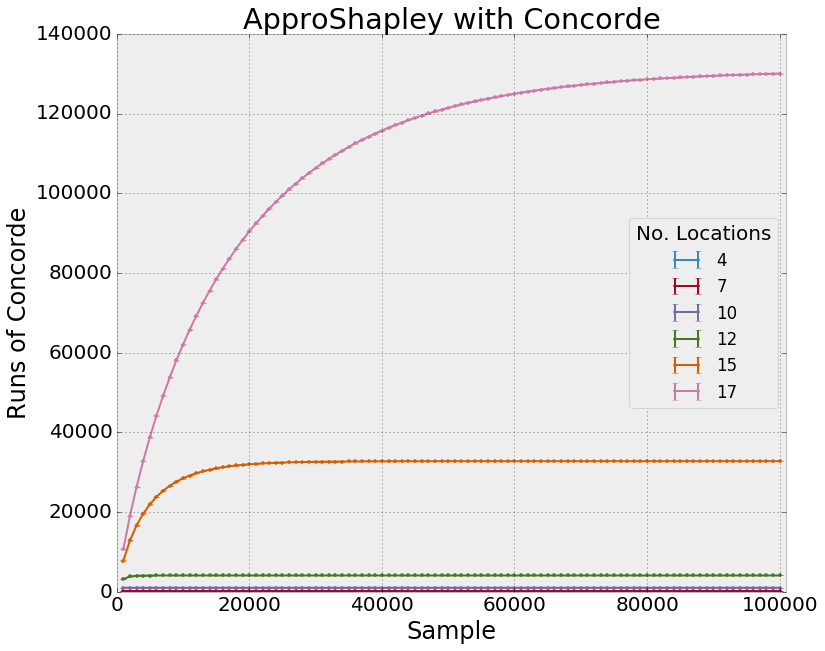

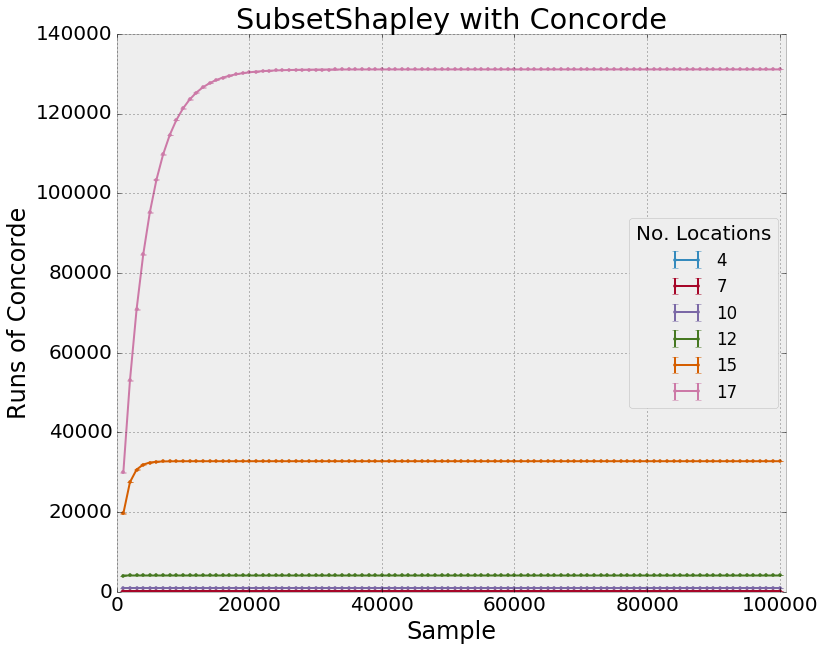

In [16]:
### Plot cache misses...

#exp_1__extended_data = pd.read_csv(path + "exp_1_35p_100.csv", comment="*")

#data = exp_1__extended_data

#data = exp_1_data
#print(data.loc[:5, ])
#data['misses'] = (data['mean_requests'] - data['mean_hits']) / data['mean_requests']
#print(data.loc[:5, ])

# misses = exp_1_data.pivot(index='sample_number', columns='num_players', values='misses')
# p = misses.ix[:,[4,7,10,12,15,17]].plot(yerr=error, marker='*')
# p.set_title("ApproShapley with Concorde")
# p.set_ylabel("Cache Misses as % of Requests")



data = exp_1_data
#print(data.loc[:5, ])
data['runs'] = (data['mean_requests'] - data['mean_hits'])
#print(data.loc[:5, ])


misses = exp_1_data.pivot(index='sample_number', columns='num_players', values='runs')
error = exp_1_data.pivot(index='sample_number', columns='num_players', values='std_hits')
p = misses.ix[:,[4,7,10,12,15,17]].plot(yerr=error, marker='.', \
                                    xlim=(-1, 101000), figsize=(12, 10))

p.legend(title="Num. Locations",loc='right', fontsize='small')
p.set_title("ApproShapley with Concorde")
p.set_ylabel("Runs of Concorde")
p.set_xlabel("Sample")
plt.savefig('appro_concorde_runs.png',bbox_inches='tight')

data = exp_2_data
# #print(data.loc[:5, ])
data['runs'] = (data['mean_requests'] - data['mean_hits'])
# #print(data.loc[:5, ])


misses = exp_2_data.pivot(index='sample_number', columns='num_players', values='runs')
error = exp_2_data.pivot(index='sample_number', columns='num_players', values='std_hits')
p = misses.ix[:,[4,7,10,12,15,17]].plot(yerr=error, marker='.',  \
                                      xlim=(-1, 101000), figsize=(12, 10))

p.legend(title="Num. Locations",loc='right', fontsize='small')
p.set_title("SubsetShapley with Concorde")
p.set_ylabel("Runs of Concorde")
p.set_xlabel("Sample")
plt.savefig('subset_concorde_runs.png',bbox_inches='tight')


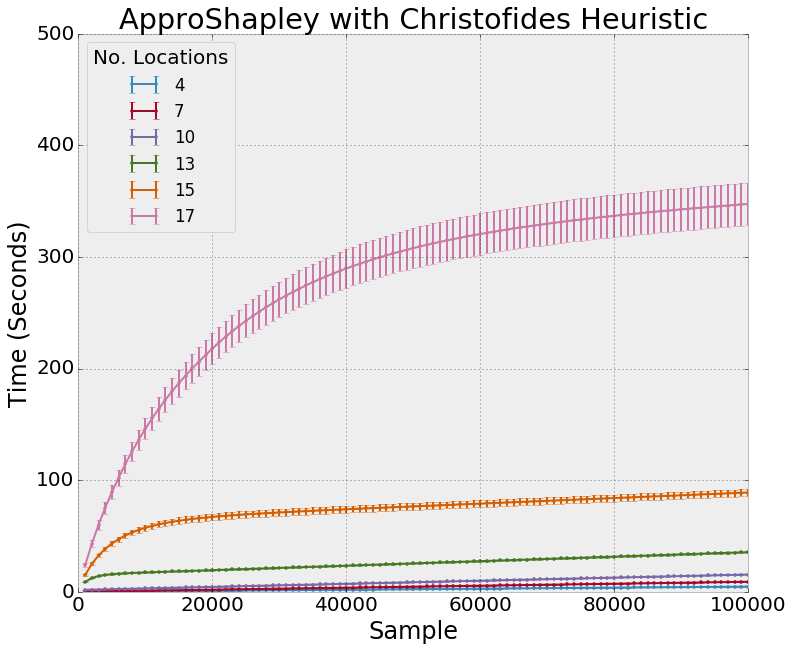

In [17]:
### Section to check on Charles stuff...

### Experiment 1 and 2 analysis...

# Sample Times..
cf_1_data = pd.read_csv(path + "cf_exp_1_1070.csv", comment="*")
cf_2_data = pd.read_csv(path + "cf_exp_2_1070.csv", comment="*")

#Errors
cf_4_data = pd.read_csv(path + "cf_exp_4_1070.csv", comment="*")
cf_5_data = pd.read_csv(path + "cf_exp_5_1070.csv", comment="*")

data = cf_1_data.pivot(index='sample_number', columns='num_players', values='mean_time')
error = cf_1_data.pivot(index='sample_number', columns='num_players', values='std_time')
p = data.ix[:, [4,7,10,13,15,17]].plot(yerr=error, marker='.', \
                                    xlim=(0, 100000), ylim=(0,500), figsize=(12, 10))
p.legend(title="Num. Locations", loc='upper left', fontsize='small')
p.set_title("ApproShapley with Christofides Heuristic")
p.set_xlabel("Sample")
p.set_ylabel("Time (Seconds)")
plt.savefig('appro_timing_chris.png',bbox_inches='tight')

